In [11]:
!pip install deepface
from deepface import DeepFace
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import glob

# Load Images

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
img_path = 'drive/MyDrive/Colab Notebooks/Tugas Kelompok 2/DatasetFoto/'
#Training Image
img_path_anggota = os.path.join(img_path, 'AnggotaKelas')
image_name_list_anggota = []
for filename in glob.glob(img_path_anggota + '/*.jpg') + glob.glob(img_path_anggota + '/*.jpeg') + glob.glob(img_path_anggota + '/*.png') + glob.glob(img_path_anggota + '/*.jfif'):
    im=Image.open(filename)
    #image_list_anggota.append(im)
    image_name_list_anggota.append(im.filename)


#Test Image
img_path_test = os.path.join(img_path, 'Test')
assert os.path.isdir(img_path_test), print(f'Could not find {img_path_test}')
image_name_list_test = []
for filename in glob.glob(img_path_test + '/*.jpg') + glob.glob(img_path_test + '/*.jpeg') + glob.glob(img_path_test + '/*.png') + glob.glob(img_path_test + '/*.jfif'):
    im=Image.open(filename)
    #image_list_test.append(im)
    image_name_list_test.append(im.filename)


# Show some anggota images

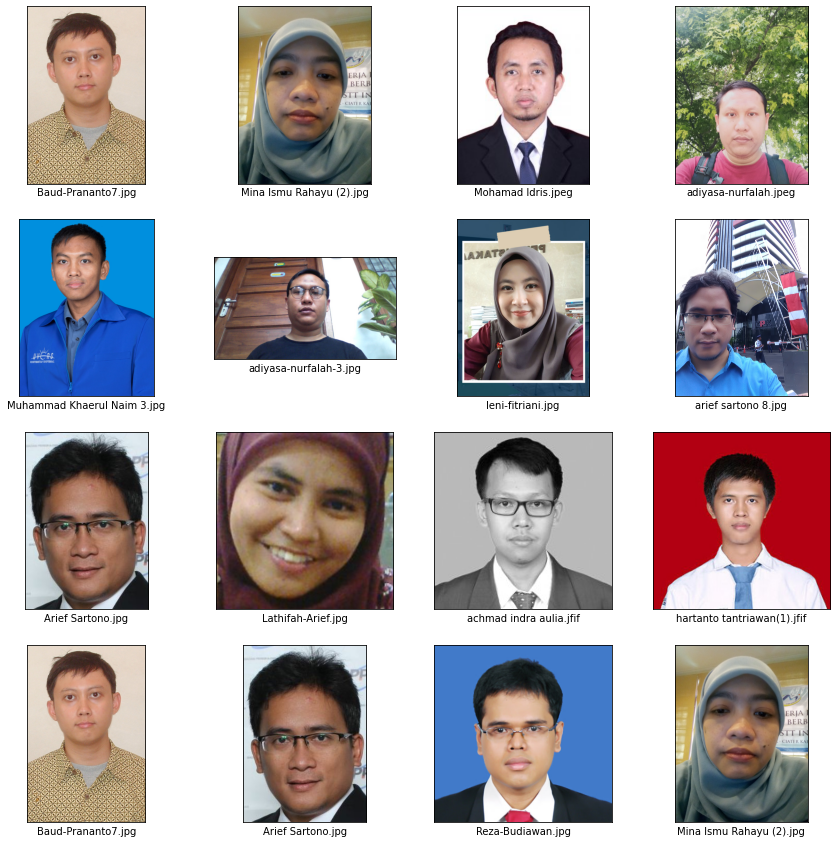

In [14]:
plt.figure(figsize=(15,15))
random_inds = np.random.choice(len(image_name_list_anggota),16)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(plt.imread(image_name_list_anggota[image_ind])), cmap=plt.cm.binary)
    plt.xlabel(os.path.basename(image_name_list_anggota[image_ind]))

# Show some test images

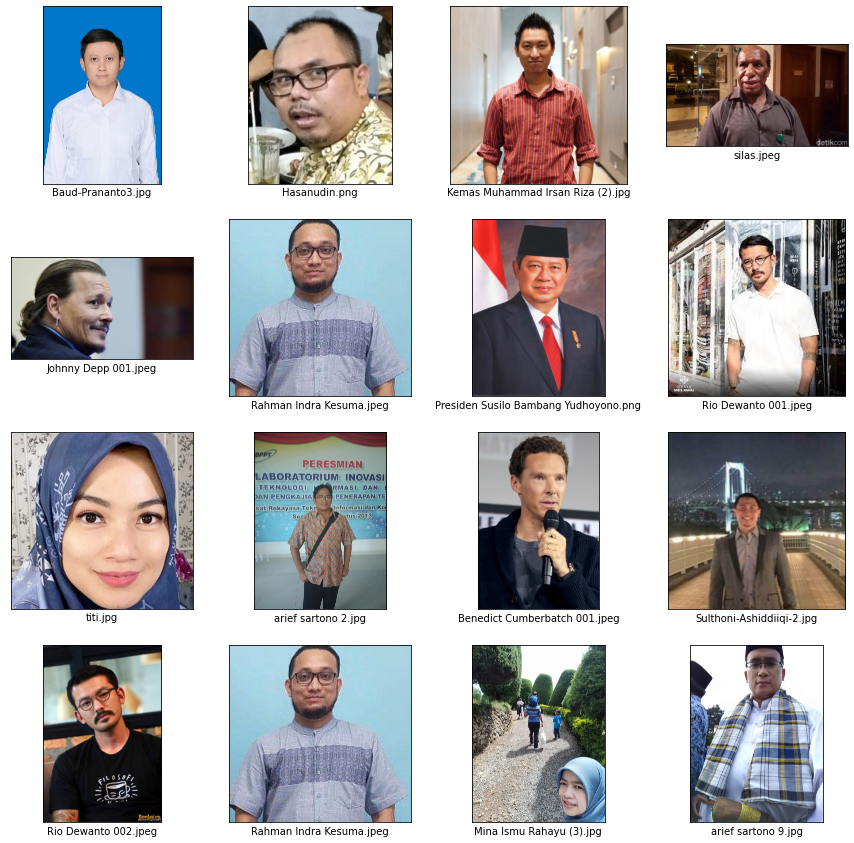

In [15]:
#show some Test pictures
plt.figure(figsize=(15,15))
random_inds = np.random.choice(len(image_name_list_test),16)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(plt.imread(image_name_list_test[image_ind])), cmap=plt.cm.binary)
    plt.xlabel(os.path.basename(image_name_list_test[image_ind]))

# Find similar face

In [16]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
result_label = [] 
result_image = []
result_distance = []
blank_img = img_path + '/Unknown.jpeg'
plt.figure(figsize=(15,15))
for i in range(len(image_name_list_test)):
  df = DeepFace.find(img_path = image_name_list_test[i], db_path = img_path_anggota, enforce_detection=False, model_name=models[4])
  print('index-',i)
  if df.shape[0] > 0:
    matched = df.iloc[0].identity
    distance = str(df.iloc[0].DeepFace_cosine)
    result_label.append(' match with ' + os.path.basename(matched))
    result_distance.append(distance)
    result_image.append(matched)
  else:
    result_label.append(os.path.basename(image_name_list_test[i]) + ' <Unknown> ')
    result_image.append(blank_img)
    result_distance.append('')

Representations stored in  drive/MyDrive/Colab Notebooks/Tugas Kelompok 2/DatasetFoto/AnggotaKelas / representations_deepface.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  54.20426082611084  seconds
index- 0
There are  42  representations found in  representations_deepface.pkl
find function lasts  2.6972572803497314  seconds
index- 1
There are  42  representations found in  representations_deepface.pkl
find function lasts  0.35398268699645996  seconds
index- 2
There are  42  representations found in  representations_deepface.pkl
find function lasts  0.5115966796875  seconds
index- 3
There are  42  representations found in  representations_deepface.pkl
find function lasts  0.33551931381225586  seconds
index- 4
There are  42  representations found in  representations_deepface.pkl
find function lasts  0.5596070289611816  seconds
index- 5
There are  42  representations found in  representations_deepface.pkl
find function lasts  0.4034

<Figure size 1080x1080 with 0 Axes>

# Show the result

In [17]:
plt.figure(figsize=(15,260))
for i in range(len(image_name_list_test)):
    #Tes
    current_number = (i+1) * 3
    plt.subplot(len(image_name_list_test),3,current_number - 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(plt.imread(image_name_list_test[i])), cmap=plt.cm.binary)
    plt.xlabel(os.path.basename(image_name_list_test[i]))
    #Target
    plt.subplot(len(image_name_list_test),3,current_number - 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(plt.imread(result_image[i])), cmap=plt.cm.binary)
    plt.xlabel(result_label[i])
    #Benar/Salah
    plt.subplot(len(image_name_list_test),3,current_number)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if len(result_distance[i]) > 0 :
      plt.text(0, 0.5, 'Accuracy (Distance) = ' + result_distance[i])
    plt.xlabel('Benar / Salah')

Output hidden; open in https://colab.research.google.com to view.